# K-Nearest Neighbours

In [7]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix
from sklearn.preprocessing import OneHotEncoder, scale
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/MBA.csv')

In [34]:
df['race'] = df['race'].fillna("Not specified")
binary_encoder=OneHotEncoder(categories='auto', drop='first')
one_hot_df = binary_encoder.fit_transform(df[["gender","international","major","race","work_industry"]]).todense()
column_names = binary_encoder.get_feature_names_out(["gender","international","major","race","work_industry"])
one_hot_df = pd.DataFrame(one_hot_df, columns=column_names)

In [35]:
new_df = pd.concat([df[["gpa","gmat","work_exp","admission"]],one_hot_df],axis=1, verify_integrity=True)

In [36]:
new_df["admission"]=new_df["admission"].fillna("Not admited")

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(new_df["admission"])
new_df["admission"] = le.transform(new_df["admission"])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(columns="admission").apply(scale),new_df["admission"], test_size=0.2)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')

print(MSE,r2)
print("Train set Accuracy: ", accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, y_pred))
print(precision, recall)
cm



0.2033898305084746 -0.43117499839568785
Train set Accuracy:  0.874066599394551
Test set Accuracy:  0.8062953995157385
0.7843492090035341 0.8062953995157385


C:\Users\PC1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([[ 55, 124,   0],
       [ 98, 944,   0],
       [  4,  14,   0]])

# Validación cruzada para encontrar el mejor k

La validación crizada no necesita partir el conjunto de datos entre entrenamiento y test pues ya está incluido. Sí es necesario escalar los datos

In [51]:
from sklearn.model_selection import cross_val_score


k_values = [i for i in range (1,31)]
scores = []

X = new_df.drop(columns="admission").apply(scale)
y = new_df["admission"]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Este código crea una lista de valores k de 1 a 30 y una lista vacía para almacenar las puntuaciones. A continuación, crea el objeto StandardScaler y lo utiliza para estandarizar los datos de entrada X. A continuación, aplica un bucle a cada valor de k de la lista k_values y crea el objeto KNeighborsClassifier con n_neighbors establecido como el valor actual de k. A continuación, utiliza cross_val_score para calcular la exactitud del clasificador utilizando validación cruzada 5 veces sobre los datos estandarizados X y la variable objetivo Y. La puntuación media de exactitud se añade a la lista scores. En general, este código realiza una búsqueda en cuadrícula de distintos valores de k para el clasificador k vecinos más próximos y utiliza la validación cruzada para evaluar el rendimiento de cada modelo. El resultado final es una lista de puntuaciones medias de exactitud para cada valor de k.

Podemos ver en nuestro gráfico que k > 12 tiene una puntuación de exactitud mayor al resto; es aconsejable utilizar un valor menor para k. Esto se debe a que, al utilizar valores más altos de k, el modelo utilizará más puntos de datos más alejados del original. Otra opción sería explorar otras métricas de evaluación.

Text(0, 0.5, 'Accuracy Score')

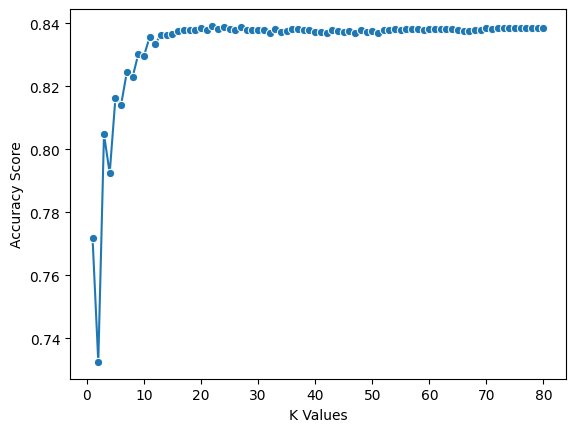

In [52]:
import seaborn as sns

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [48]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=22)

In [50]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8426150121065376
Precision: 0.7888788660473606
Recall: 0.8426150121065376


C:\Users\PC1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
df.race.dropna()

0               Asian
1               Black
2       Not specified
3               Black
4            Hispanic
            ...      
6189            White
6190            Black
6191    Not specified
6192    Not specified
6193         Hispanic
Name: race, Length: 6194, dtype: object

In [13]:
one_hot_df

,gender_Male,international_True,major_Humanities,major_STEM,race_Black,race_Hispanic,race_Not specified,race_Other,race_White,work_industry_Consulting,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6190,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6191,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6192,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
df = pd.read_csv('data/MBA.csv')
binary_encoder=OneHotEncoder(categories='auto')
one_hot_df = binary_encoder.fit_transform(df[["gender","major","race","work_industry"]]).todense()
column_names = binary_encoder.get_feature_names_out(["gender","major","race","work_industry"])
one_hot_df = pd.DataFrame(one_hot_df, columns=column_names)

In [15]:
new_df = pd.concat([df[["gpa","gmat","work_exp","admission"]],one_hot_df],axis=1, verify_integrity=True)
new_df=new_df[['gpa', 'gmat', 'work_exp', 'admission', 
                'gender_Female', 'gender_Male', 'major_Business', 
                'major_Humanities', 'work_industry_Health Care', 
                'work_industry_Investment Banking', 
                'work_industry_Investment Management',
                'work_industry_Media/Entertainment', 
                'work_industry_Nonprofit/Gov', 'work_industry_Other', 
                'work_industry_PE/VC', 'work_industry_Real Estate', 
                'work_industry_Retail', 'work_industry_Technology']]

In [16]:
new_df["admission"]=new_df["admission"].fillna("Not admited")

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # We are using label encoder to convert categorical labels to number
le.fit(new_df["admission"])
new_df["admission"] = le.transform(new_df["admission"])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop(columns="admission").apply(scale),new_df["admission"], test_size=0.2, random_state=4)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

print(MSE,r2)
print("Train set Accuracy: ", accuracy_score(y_train, model.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, y_pred))
cm



0.2122679580306699 -0.4963630686149352
Train set Accuracy:  0.8704339051463168
Test set Accuracy:  0.7998385794995965


array([[ 64, 117,   1],
       [112, 927,   2],
       [  4,  12,   0]])

# Uno que me encontré en kaggle

Tiene mucho precisión pero no sé porqué

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [22]:
df = pd.read_csv('data/MBA.csv')

In [23]:
df['admission'] = df['admission'].replace({'Admit': 1, 'Waitlist': 2})
df['admission'] = df['admission'].fillna(0)
df['admission'].value_counts()

C:\Users\PC1\AppData\Local\Temp\ipykernel_19400\254097141.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['admission'] = df['admission'].replace({'Admit': 1, 'Waitlist': 2})


admission
0.0    5194
1.0     900
2.0     100
Name: count, dtype: int64

In [24]:
pd.options.display.max_columns = None
X_train


,gpa,gmat,work_exp,gender_Female,gender_Male,major_Business,major_Humanities,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
3603,-0.202691,0.992212,-0.016421,1.323505,-1.323505,-0.649574,1.223345,-0.238740,-0.321424,-0.165946,-0.098066,-0.342703,-0.270048,-0.414189,-0.135084,-0.073187,-0.361531
6074,1.579147,-0.225052,-0.016421,-0.755569,0.755569,1.539470,-0.817431,-0.238740,3.111159,-0.165946,-0.098066,-0.342703,-0.270048,-0.414189,-0.135084,-0.073187,-0.361531
2206,0.325261,1.397966,0.952244,-0.755569,0.755569,-0.649574,-0.817431,-0.238740,-0.321424,-0.165946,-0.098066,2.917978,-0.270048,-0.414189,-0.135084,-0.073187,-0.361531
4906,0.391255,0.789334,-0.016421,-0.755569,0.755569,1.539470,-0.817431,-0.238740,3.111159,-0.165946,-0.098066,-0.342703,-0.270048,-0.414189,-0.135084,-0.073187,-0.361531
4652,-0.466667,0.180703,0.952244,-0.755569,0.755569,-0.649574,1.223345,-0.238740,-0.321424,-0.165946,-0.098066,2.917978,-0.270048,-0.414189,-0.135084,-0.073187,-0.361531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6017,-0.532661,-0.225052,-0.985085,1.323505,-1.323505,1.539470,-0.817431,-0.238740,-0.321424,6.026048,-0.098066,-0.342703,-0.270048,-0.414189,-0.135084,-0.073187,-0.361531
709,-0.334679,-0.225052,0.952244,1.323505,-1.323505,-0.649574,1.223345,-0.238740,-0.321424,-0.165946,-0.098066,-0.342703,-0.270048,-0.414189,-0.135084,-0.073187,-0.361531
2487,-1.060614,0.180703,-0.985085,-0.755569,0.755569,-0.649574,-0.817431,4.188664,-0.321424,-0.165946,-0.098066,-0.342703,-0.270048,-0.414189,-0.135084,-0.073187,-0.361531
174,-0.532661,-0.427929,0.952244,1.323505,-1.323505,-0.649574,-0.817431,-0.238740,-0.321424,-0.165946,-0.098066,2.917978,-0.270048,-0.414189,-0.135084,-0.073187,-0.361531


In [25]:
df['race'] = df['race'].fillna("Not specified")

categorical_columns = ['gender', 'major', 'race', 'work_industry']

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)
df_encoded

,application_id,international,gpa,gmat,work_exp,admission,gender_Female,gender_Male,major_Business,major_Humanities,major_STEM,race_Asian,race_Black,race_Hispanic,race_Not specified,race_Other,race_White,work_industry_CPG,work_industry_Consulting,work_industry_Energy,work_industry_Financial Services,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,1,False,3.30,620.0,3.0,1.0,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,2,False,3.28,680.0,5.0,0.0,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,3,True,3.30,710.0,5.0,1.0,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,4,False,3.47,690.0,6.0,0.0,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,5,False,3.35,590.0,5.0,0.0,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6189,6190,False,3.49,640.0,5.0,0.0,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
6190,6191,False,3.18,670.0,4.0,0.0,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
6191,6192,True,3.22,680.0,5.0,1.0,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
6192,6193,True,3.36,590.0,5.0,0.0,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [26]:


X = df_encoded[['gpa', 'gmat', 'work_exp', 'admission', 
                'gender_Female', 'gender_Male', 'major_Business', 
                'major_Humanities', 'major_STEM',
                'race_Asian', 'race_Black',
                'race_Hispanic', 'race_Not specified',
                'race_Other','race_White',
                'work_industry_CPG','work_industry_Consulting',
                'work_industry_Energy','work_industry_Financial Services',
                'work_industry_Health Care', 
                'work_industry_Investment Banking', 
                'work_industry_Investment Management',
                'work_industry_Media/Entertainment', 
                'work_industry_Nonprofit/Gov', 'work_industry_Other', 
                'work_industry_PE/VC', 'work_industry_Real Estate', 
                'work_industry_Retail', 'work_industry_Technology']].values
X



array([[3.3, 620.0, 3.0, ..., False, False, False],
       [3.28, 680.0, 5.0, ..., False, False, False],
       [3.3, 710.0, 5.0, ..., False, False, True],
       ...,
       [3.22, 680.0, 5.0, ..., False, False, False],
       [3.36, 590.0, 5.0, ..., False, False, False],
       [3.23, 650.0, 4.0, ..., False, False, False]], dtype=object)

In [27]:
print(X.shape)
print(X_train.shape)

(6194, 29)
(4955, 17)


In [28]:
y=df[['admission']].values
y

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [0.]])

In [29]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.32526081, -0.6308059 , -1.95375019,  1.94742642,  1.32350517,
        -1.32350517,  1.53946983, -0.81743063, -0.65888411,  2.09765926,
        -0.41659403, -0.32629219, -0.65057949, -0.19946209, -0.55434886,
        -0.13693064, -0.59487796, -0.0720633 ,  3.5684625 , -0.23873958,
        -0.32142362, -0.16594624, -0.09806606, -0.34270312, -0.27004757,
        -0.41418941, -0.13508359, -0.07318657, -0.36153096],
       [ 0.19327277,  0.58645722, -0.0164207 , -0.42052789, -0.7555694 ,
         0.7555694 , -0.64957428,  1.2233454 , -0.65888411, -0.47672185,
         2.40041845, -0.32629219, -0.65057949, -0.19946209, -0.55434886,
        -0.13693064, -0.59487796, -0.0720633 , -0.28023273, -0.23873958,
        -0.32142362,  6.02604788, -0.09806606, -0.34270312, -0.27004757,
        -0.41418941, -0.13508359, -0.07318657, -0.36153096],
       [ 0.32526081,  1.19508879, -0.0164207 ,  1.94742642,  1.32350517,
        -1.32350517,  1.53946983, -0.81743063, -0.65888411, -0.47672185,
  

In [30]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)



Train set: (4955, 29) (4955, 1)
Test set: (1239, 29) (1239, 1)


In [31]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_train = y_train.squeeze()
neigh.fit(X_train, y_train)
yhat = neigh.predict(X_test)

C:\Users\PC1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [32]:


from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))



Train set Accuracy:  0.9457114026236125
Test set Accuracy:  0.9233252623083131
